# Nevrale nett fra grunnen (og med torch)

Vi skal i denne økta se på hvordan vi lager og trener nevrale nett som vi kan modellere med. Vi skal i første omgang se på hvordan en lite nevralt nett kan klassifisere Iris-blomster. 

In [127]:
import urllib
url = "https://programmering-i-skolen.github.io/programmeringiskolen/_static/datasett/iris.csv"
#urllib.request.urlopen(url).read().decode("utf-8").split("\n")
# Si litt om datasettet 

In [128]:
# Vi begynner med å laste inn datasettet 
# Dele denne i zoom-chat https://programmering-i-skolen.github.io/programmeringiskolen/_static/datasett/iris.csv
import numpy as np

# Prediktorer: x_1, x_2, ...
x = np.loadtxt(url, delimiter=",", skiprows=1, usecols=(0,1,2,3))

# Labels: y
species = np.loadtxt(url, delimiter=",", skiprows=1, usecols=(4), dtype=str)

In [129]:
# Hva har vi fått?
#display(x)
#display(species)

No handles with labels found to put in legend.


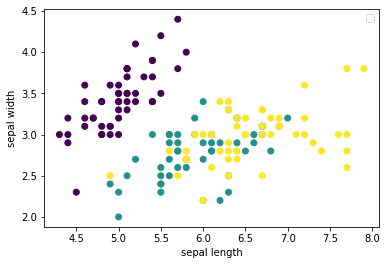

In [130]:
# Så skal vi plotte litt for å se hvordan datasettet ser ut 
# Først gjør vi om artene til kategorier
y = np.zeros(len(species))
y[species == "setosa"] = 0
y[species == "versicolor"] = 1
y[species == "virginica"] = 2

import matplotlib.pyplot as plt
plt.scatter(x[:,0], x[:,1], c=y)
# Husker at ['Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species'], så
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()

## Litt diskusjon av dette på iPad. 

---
### Underveisoppgave 1
Med det vi ser i plottet her, hva kan vi få til med et perseptron med to inputs? 

**Løsning**
- Skille mellom setosa og resten

Hvordan gjør vi det? 

**Løsning**
- Finner likningen for den linja som skiller disse gruppene 

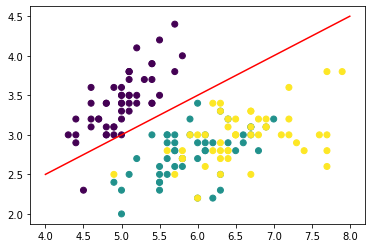

In [131]:
# Når vi har funnet at w1=0.5, w2=-1 og b=0.5 kan vi f. eks. trekke en masse punkter og evaluere dem:
plt.scatter(x[:,0], x[:,1], c=y)

x1 = np.random.random((100))*4+4
x2 = np.random.random((100))*2.5+2

w2 = -1
w1 = 0.5
b  = 0.5
    
def perceptron(x1, x2):
    return 1*(w1*x1+w2*x2+b>0) + 0

#Se at modellen vår klarer å klassifisere nye datapunkter vi trekker. 
#plt.scatter(x1, x2, c=perceptron(x1, x2), cmap="winter", s=50, alpha=0.5)
# Vi ser at klassifiseringen passer for alt unntatt det ene mørkeblå punktet

# Vi kan også tegne inn decision boundary: x2 = -w1/w2 - b/w2
def decision_boundary(x1):
    return -w1/w2*x1-b/w2

x_b = np.linspace(4, 8, 10)
y_b = decision_boundary(x_b)
plt.plot(x_b, y_b, c="r")

# Ble jo ikke helt perfekt, men la oss heller gå systematisk til verks. 

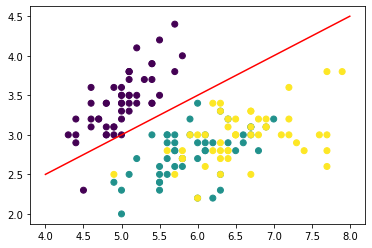

In [132]:
def perceptron(x, w, b):
    return np.dot(x, w) + b

def decision_boundary_2(x1, w, b):
    return -w[0]/w[1]*x1-b/w[1]

def plot_decision_boundary(w, b):
    x1 = np.linspace(4, 8, 100)
    x2 = decision_boundary_2(x1, w, b)
    plt.plot(x1, x2, "r")

w = [0.5, -1]
b = 0.5
plt.scatter(x[:,0], x[:,1], c=y)
plot_decision_boundary(w, b)

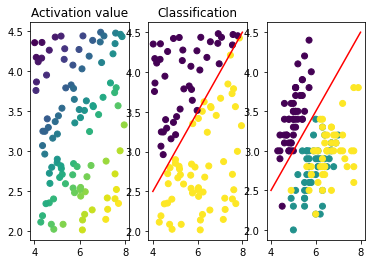

In [133]:
# Hva nå med å gjøre om til nevron
def activation(z):
    return 1/(1+np.exp(-z))

def neuron(x, w, b):
    return activation(perceptron(x, w, b))

x_r = np.random.random((100, 2))
x_r[:,0] = x_r[:,0]*4+4
x_r[:,1] = x_r[:,1]*2.5+2
output = neuron(x_r, [0.5, -1], 0.5)
plt.subplot(1, 3,1)
plt.scatter(x_r[:,0], x_r[:,1], c=output)
plt.title("Activation value")
plt.subplot(1, 3,2)
plt.scatter(x_r[:,0], x_r[:,1], c=output>0.5)
plt.plot(x_b, y_b, c="r")
plt.title("Classification")
plt.subplot(1, 3,3)
plt.scatter(x[:,0], x[:,1], c=y)
plt.plot(x_b, y_b, c="r")

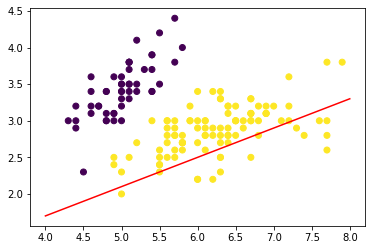

In [135]:
# Prøve nevronet vårt med gale inputs
x_selection = x[:,0:2] 

w = np.array([0.4, -1])
b = 0.1

y_pred = 1*(neuron(x_selection, w, b)>0.5) + 0

y_true = y[:]
y_true[y_true==2] = 1

def accuracy_score(y_true, y_pred):
    equals = np.equal(y_true, y_pred)
    accuracy = np.sum(equals)/len(equals)
    return accuracy

accuracy_score(y_true, y_pred)
plt.scatter(x[:,0], x[:,1], c=y)
plot_decision_boundary(w, b)

## Underveisoppgave
Hva nå?

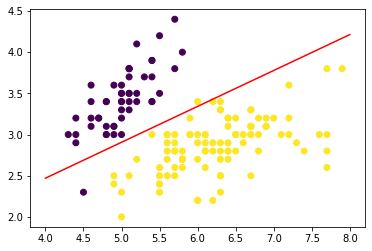

In [137]:
# Trene nevronet
lr = 0.0002

for i in range(1000):
    y_neur = (neuron(x_selection, w, b)>0.5)*1
    y_diff = -(y_true-y_neur)
    dCdw1 = np.dot(x_selection[:,0], y_diff) / len(x_selection)
    dCdw2 = np.dot(x_selection[:,1], y_diff) / len(x_selection)
    dCdb = np.sum(y_diff)

    w[0] = w[0]-lr*dCdw1
    w[1] = w[1]-lr*dCdw2
    b = b-lr*dCdb
    
plt.scatter(x[:,0], x[:,1], c=y)
plot_decision_boundary(w, b)

# Bruke PyTorch til å gjøre det samme! 

In [10]:
!pip install -q torch

You should consider upgrading via the 'pip install --upgrade pip' command.


100 tensor(16.0592, grad_fn=<SumBackward0>)
300 tensor(7.9911, grad_fn=<SumBackward0>)
1000 tensor(3.7961, grad_fn=<SumBackward0>)
3000 tensor(2.2387, grad_fn=<SumBackward0>)
6000 tensor(1.7351, grad_fn=<SumBackward0>)
4.113640308380127 -6.568455696105957 -1.685802698135376


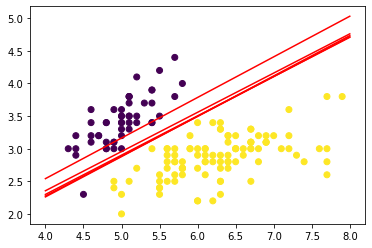

In [140]:
# -*- coding: utf-8 -*-
import numpy as np
import torch
from torch import nn

dtype = torch.float
device = torch.device("cpu")

# Randomly initialize weights
w1 = torch.rand((), device=device, dtype=dtype, requires_grad=True)
w2 = torch.rand((), device=device, dtype=dtype, requires_grad=True)
b = torch.rand((), device=device, dtype=dtype, requires_grad=True)

# Prepare data 
x_torch = torch.Tensor(x)
y_torch = torch.Tensor(y)
learning_rate = 1e-3

for t in range(10000):
    y_pred = torch.sigmoid(x_torch[:,0]*w1+x_torch[:,1]*w2+b)
    loss = (y_pred - y_torch).pow(2).sum()
    loss.backward()
    
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        b  -= learning_rate * b.grad
        
        w1.grad = None
        w2.grad = None
        b.grad = None
        
    if t in [100, 300, 1000, 3000, 6000]:# == 99 and t >= 1000:
        print(t, loss)
        plot_decision_boundary([w1.item(), w2.item()], b.item())
    
        
plt.scatter(x[:,0], x[:,1], c=y)
print(w1.item(), w2.item(), b.item())

0.66

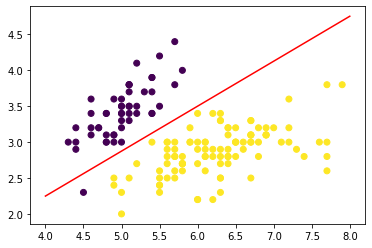

In [142]:
plt.scatter(x[:,0], x[:,1], c=y)
plot_decision_boundary([w1.item(), w2.item()], b.item())

# Accuracy?
y = np.zeros(len(species))
y[species == "setosa"] = 0
y[species == "versicolor"] = 1
y[species == "virginica"] = 2

accuracy_score(y, y_pred.detach().numpy()>0.5)

### Underveisoppgave
Dette ser egentlig OK ut, så hvorfor får jeg accuracy på 0.66? 

**Løsning** 
- Fordi vi kun predikerer på (0,1), og noen av blomstene er kategori 2. 


## Lage en modell som predikerer hvilken av de *tre* blomstene vi har å gjøre med

### Underveisoppgave
Hvordan kan vi designe et nett som lar oss gjøre dette? 

/Users/henriksveinsson/.pyenv/versions/3.8.2/envs/hon2200/lib/python3.8/site-packages/torch/nn/modules/container.py:119: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


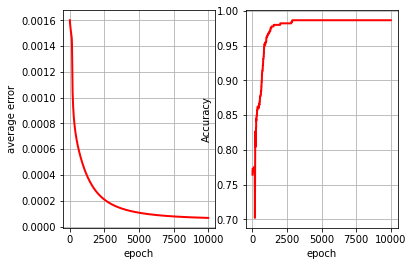

Final accuracy:  0.9866666793823242


In [126]:
# La oss bruke nn.Sequential 

learning_rate = 1e-3
num_epoch = 10000

# Sette opp en modell 
model = torch.nn.Sequential(
          torch.nn.Linear(4, 3),
          torch.nn.Softmax(), # Passer på at sannsynlighetene til sammen blir 1
        )

loss_fn = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

import pandas as pd
data = pd.read_csv("https://programmering-i-skolen.github.io/programmeringiskolen/_static/datasett/iris.csv")

y = torch.Tensor(pd.get_dummies(data[["Species"]], columns=["Species"]).values)
x = torch.Tensor(data.drop(columns=["Species"]).values)

avg_loss_list = list()
epoch_list = list()
accuracy_list = list()

for epoch in range(num_epoch):
    # Her skjer alt! 
    y_pred = model(x)
    total_loss = loss_fn(y_pred, y)
    optimizer.zero_grad() # Nulle gradienten 
    total_loss.backward() # Backpropagation
    optimizer.step() # w_ij -= learning_rate * dC/dw_ij

    
    ## Samler opp diagnostikk
    avg_loss = total_loss/x.size()[0]
    avg_loss_list.append(avg_loss)
    epoch_list.append(epoch)
    
    correct = ((y_pred>0.5).float() == y).float().sum()
    accuracy_list.append(correct/np.prod(y.detach().numpy().size))
    
# Plot loss
plt.subplot(1, 2, 1)
plt.plot(epoch_list, avg_loss_list, 'r-', lw=2)
plt.xlabel("epoch")
plt.ylabel("average error")
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(epoch_list, accuracy_list, 'r-', lw=2)
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

print("Final accuracy: ", (correct/np.prod(y.detach().numpy().size)).item())

In [ ]:
# Så skal vi se hva som kommer ut av nettet om vi sender Iris-data gjennom (utrent)


In [ ]:
# Hvordan skal vi trene dette nettet? 

In [ ]:
# Hvordan blir da prediksjonene. Kan vi måle nøye hvordan det går?

In [ ]:
# Hva har nettverkstopologien å si? 

In [ ]:
# Ha om vi vil slippe å kode opp nettene selv? eg. PyTorch 